# Graph Topology - Make Table

In [1]:
import pandas as pd
import pickle
import seaborn as sns

In [2]:
with open('graph_top_stats.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [3]:
# 228 isntances of -1

In [4]:
data = {k: v for k, v in data.items() if v != -1}

In [5]:
count = 0
for k, v in data.items():
    if v == -1:
        print(k)
        count += 1
        
print(count)

0


In [6]:
# TODO change number of axioms to number of formulae! Just add +1

In [7]:
df = pd.DataFrame(data).T

In [8]:
df = df[sorted(df.columns)]

# Type conversion on the ints
type_map = {'No Axioms': int, 'No Edges': int, 'No Nodes': int, 'Diameter': int, 'Communities': int}
df = df.astype(type_map) 

df

,Average geodesic,Cluster coefficient,Communities,Degree Correlation,Degree max,Degree mean,Degree min,Diameter,No Axioms,No Edges,No Nodes,Transitivity
t28_glib_000,6.929091,0.100660,19,-0.094504,29.0,3.282383,1.0,15,14,1267,772,0.067485
t4_ratfunc1,8.576516,0.140966,20,-0.095537,29.0,3.436548,1.0,21,18,1354,788,0.109728
t23_waybel10,7.200083,0.110100,19,-0.022480,32.0,3.235023,1.0,18,18,1404,868,0.080279
t88_xboole_1,6.043434,0.133333,7,0.103443,6.0,3.140000,1.0,14,4,157,100,0.131868
t26_csspace,7.017493,0.091841,16,-0.088182,31.0,3.268191,1.0,20,18,1572,962,0.067811
...,...,...,...,...,...,...,...,...,...,...,...,...
t20_zf_model,6.701373,0.137732,19,-0.055188,71.0,3.465819,1.0,16,24,2180,1258,0.074380
t12_circled1,6.913107,0.067525,15,-0.177648,15.0,3.112871,1.0,16,10,786,505,0.052564
t46_intpro_1,5.438996,0.175922,16,-0.067485,40.0,3.440901,1.0,12,14,917,533,0.076214
t17_pdiff_3,6.288051,0.170036,28,-0.053653,228.0,3.680288,1.0,16,34,4593,2496,0.040291


## Plot correlation between axioms and communities

In [9]:
df['No Formulae'] = df['No Axioms'] + 1

In [10]:
# Axiom and community correlation
df['No Formulae'].corr(df['Communities'])

0.8848340548634146

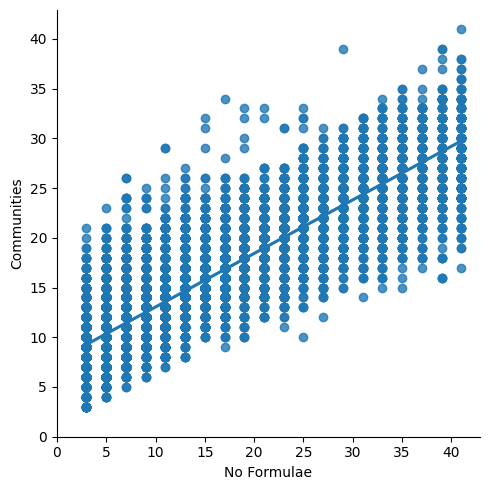

In [11]:
g = sns.lmplot(x="No Formulae", y="Communities", data=df)
#max_label = int(max(max(df["No Axioms"]), max(df['Communities'])))
#ax.set_xticklabels(range(0, max_label + 1))
#ax.set_yticklabels(range(0, max_label + 1))

# tODO this is not the right plot!!

g.set(ylim=(0, None))
g.set(xlim=(0, None))

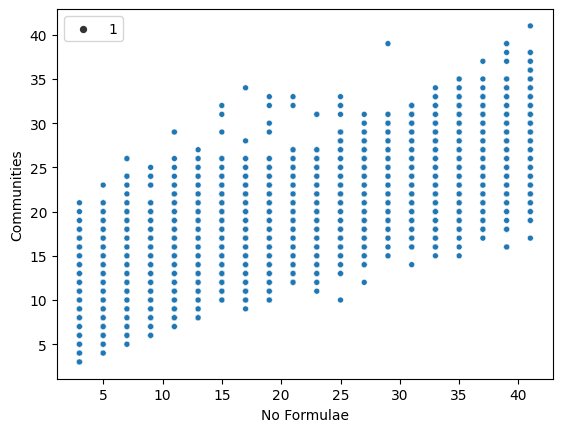

In [12]:
g = sns.scatterplot(x="No Formulae", y="Communities", data=df, size=1)


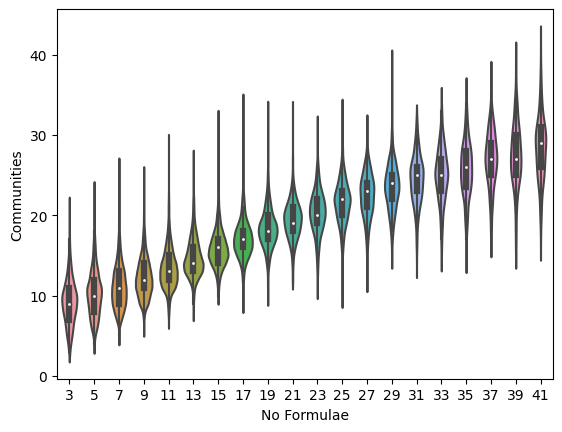

In [13]:
g = sns.violinplot(x="No Formulae", y="Communities", data=df, size=1)


# Create stats table

In [14]:
#df_min = df.min().astype(type_map)
#df_max = df.max().astype(type_map)
#df_mean = df.mean()

#df_tab = pd.concat([df.min(), df.max(), df.mean()], axis=1)
df_tab = pd.concat([df.min(), df.max(), df.mean()], axis=1)

df_tab.rename(columns={0: 'Min', 1: 'Max', 2: 'Mean'}, inplace=True)
df_tab.index = df_tab.index.rename('Property')

df_tab = df_tab.sort_index()

df_tab = df_tab.round(2)

In [15]:
df_tab

,Min,Max,Mean
Property,,,
Average geodesic,1.96,11.46,6.67
Cluster coefficient,0.00,0.22,0.10
Communities,3.00,41.00,15.69
Degree Correlation,-0.71,0.31,-0.09
Degree max,3.00,409.00,26.45
Degree mean,1.80,4.17,3.21
Degree min,1.00,1.00,1.00
Diameter,3.00,35.00,15.99
No Axioms,2.00,40.00,13.91


In [16]:
print(df_tab.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &   Min &      Max &     Mean \\
Property            &       &          &          \\
\midrule
Average geodesic    &  1.96 &    11.46 &     6.67 \\
Cluster coefficient &  0.00 &     0.22 &     0.10 \\
Communities         &  3.00 &    41.00 &    15.69 \\
Degree Correlation  & -0.71 &     0.31 &    -0.09 \\
Degree max          &  3.00 &   409.00 &    26.45 \\
Degree mean         &  1.80 &     4.17 &     3.21 \\
Degree min          &  1.00 &     1.00 &     1.00 \\
Diameter            &  3.00 &    35.00 &    15.99 \\
No Axioms           &  2.00 &    40.00 &    13.91 \\
No Edges            &  8.00 &  8931.00 &  1104.50 \\
No Formulae         &  3.00 &    41.00 &    14.91 \\
No Nodes            &  8.00 &  4871.00 &   667.29 \\
Transitivity        &  0.00 &     0.26 &     0.08 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_610395/1203108888.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_tab.to_latex())


In [17]:
df.describe()

,Average geodesic,Cluster coefficient,Communities,Degree Correlation,Degree max,Degree mean,Degree min,Diameter,No Axioms,No Edges,No Nodes,Transitivity,No Formulae
count,21951.000000,21951.000000,21951.000000,21951.000000,21951.000000,21951.000000,21951.0,21951.000000,21951.000000,21951.000000,21951.000000,21951.000000,21951.000000
mean,6.674943,0.104430,15.688032,-0.085238,26.445082,3.209513,1.0,15.994898,13.912806,1104.504214,667.287003,0.083451,14.912806
std,0.877109,0.032852,5.782440,0.079870,22.332910,0.222020,0.0,3.447566,9.501289,951.165387,544.530501,0.026099,9.501289
min,1.964286,0.000000,3.000000,-0.709402,3.000000,1.800000,1.0,3.000000,2.000000,8.000000,8.000000,0.000000,3.000000
25%,6.104429,0.082876,11.000000,-0.126715,13.000000,3.064935,1.0,14.000000,6.000000,429.000000,276.000000,0.066143,7.000000
50%,6.676031,0.103535,15.000000,-0.071548,20.000000,3.202559,1.0,16.000000,12.000000,825.000000,514.000000,0.082418,13.000000
75%,7.249256,0.126052,19.000000,-0.040292,33.000000,3.355466,1.0,18.000000,20.000000,1505.500000,902.000000,0.099713,21.000000
max,11.457552,0.223257,41.000000,0.307458,409.000000,4.171378,1.0,35.000000,40.000000,8931.000000,4871.000000,0.257143,41.000000


<AxesSubplot: xlabel='Degree Correlation', ylabel='Count'>

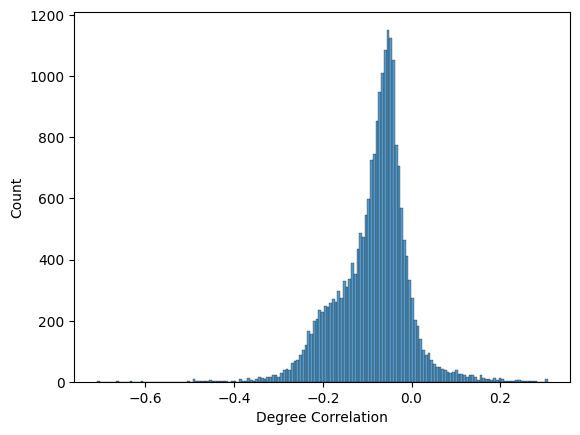

In [21]:
sns.histplot(df['Degree Correlation'])

In [26]:
df['Degree Correlation'].corr(df['Communities'])

0.14378072558584998